In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# df = pd.read_csv('data/2013-14.csv')
# df['HomeTeam'].to_list()

In [144]:
team = 'Crystal Palace'
years = ['2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
balances = dict()

for year in years:
    df = pd.read_csv(f'data/{year}.csv', usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A'])
    df = df[(df.HomeTeam == team) | (df.AwayTeam == team)]
    wager = 10
    balance = wager * 38
    score = [balance]

    for i in range(len(df)):
        balance -= wager
        if df.iloc[i].FTR == 'D':
            continue
        else:
            if df.iloc[i].HomeTeam == team and df.iloc[i].FTR == 'H':
                balance += wager * df.iloc[i].B365H
            elif df.iloc[i].AwayTeam == team and df.iloc[i].FTR == 'A':
                balance += wager * df.iloc[i].B365A
            else:
                continue
        score.append(balance)
    balances[year] = balance - 380

Average Increase: 7.069377990430622%


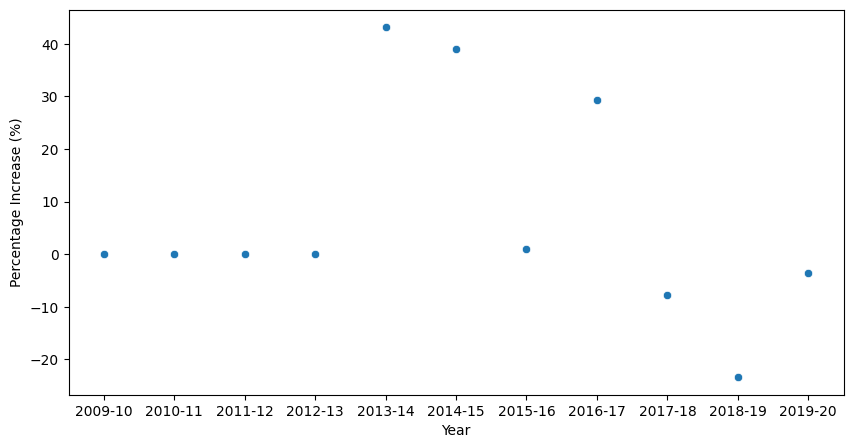

In [145]:
# Calculate average increase as a percentage.
total = 0
plots = dict()
for key in balances:
    # total += (balances[key] - 100) / 100
    total += balances[key]
    plots[key] = (balances[key] / 3.8)
print(f'Average Increase: {(total / len(balances)) / 3.8}%')

# Plot final balance per year.
plt.figure(figsize=(10, 5))
g = sns.scatterplot(data=plots)
plt.ylabel('Percentage Increase (%)')
plt.xlabel('Year')
plt.show()